# Lesson 38: The Web Browser Module

In [6]:
import webbrowser as wb

# Command Line
import sys

# paste / copy
import pyperclip as pc

In [3]:
wb.open('https://google.com')

True

### sys.argv is a list 

['mapit.py', '870', 'Valencia St.']

Save the file inside MyPythonScript. mapit.py.

Then run chmod +x mapit.py. This gives the file permission. Afterward run on the Command Line as ./mapit.py '<ADDRESS>'

In [14]:
# Map it

if len(sys.argv) > 1: 
   
   # Bat file
   # ['mapit.py', '870', 'Valencia St.'] --> '870 Valencia St'
    address = ''.join(sys.argv[1:])
    
else: 
    address = pc.paste()

# https://www.google.com/maps/place/<ADDRESS>
wb.open('https://www.google.com/maps/place/' + address)

True

In [15]:
address = pc.paste()

# https://www.google.com/maps/place/<ADDRESS>
wb.open('https://www.google.com/maps/place/' + address)

True

# Lesson 39: The Request Module

In [16]:
import requests as rq

In [18]:
res = rq.get('https://automatetheboringstuff.com/files/rj.txt')
res.status_code

200

In [19]:
len(res.text)

178978

In [20]:
print(res.text[:500])

The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org/license


Title: Romeo and Juliet

Author: William Shakespeare

Posting Date: May 25, 2012 [EBook #1112]
Release Date: November, 1997  [Etext #1112]

Language: Eng


In [21]:
# Raise an Exception

badRes = rq.get('https://automatetheboringstuff.com/files/2323r23r3.txt')
badRes.raise_for_status()

HTTPError: 404 Client Error: Not Found for url: https://automatetheboringstuff.com/files/2323r23r3.txt

In [22]:
playFile = open('RomeoAndJuliet.txt', 'wb')

In [23]:
# Each chunk is byte data type. 
# Specify how many bytes each chunch will Contain.

for chunk in res.iter_content(100000):
    playFile.write(chunk)
    

In [24]:
playFile.close()

Lesson 39 Recap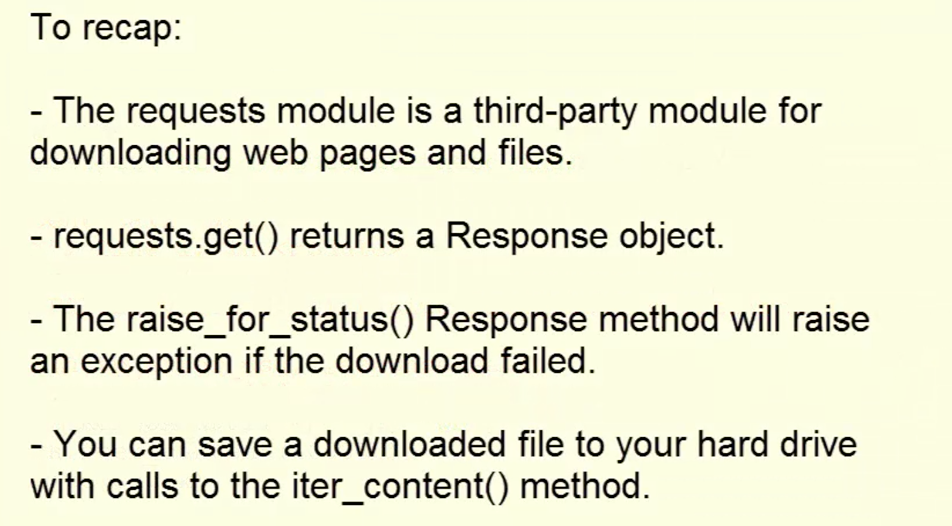

# Lesson 40: Parsing HTML with the Beautiful Soup Module

In [57]:
# Import Beautiful Soup

import bs4
import requests as rq

In [68]:
res = rq.get('https://www.amazon.com/Python-Crash-Course-2nd-Edition/dp/1593279280/ref=pd_sbs_14_t_0/139-5699301-4506809?_encoding=UTF8&pd_rd_i=1593279280&pd_rd_r=14e2083f-e12f-4aa1-ab71-0ee4ba4b0ebe&pd_rd_w=PbwVT&pd_rd_wg=N9iFd&pf_rd_p=5cfcfe89-300f-47d2-b1ad-a4e27203a02a&pf_rd_r=M0X5039JNCB8CK1J6617&psc=1&refRID=M0X5039JNCB8CK1J6617')
res.raise_for_status()

HTTPError: 503 Server Error: Service Unavailable for url: https://www.amazon.com/Python-Crash-Course-2nd-Edition/dp/1593279280/ref=pd_sbs_14_t_0/139-5699301-4506809?_encoding=UTF8&pd_rd_i=1593279280&pd_rd_r=14e2083f-e12f-4aa1-ab71-0ee4ba4b0ebe&pd_rd_w=PbwVT&pd_rd_wg=N9iFd&pf_rd_p=5cfcfe89-300f-47d2-b1ad-a4e27203a02a&pf_rd_r=M0X5039JNCB8CK1J6617&psc=1&refRID=M0X5039JNCB8CK1J6617

In [39]:
soup = bs4.BeautifulSoup(res.text)

In [65]:
soup.select('#buyNewSection > h5 > div > div.a-column.a-span8.a-text-right.a-span-last > div > span.a-size-medium.a-color-price.offer-price.a-text-normal')

[<span class="a-size-medium a-color-price offer-price a-text-normal">$21.00</span>]

In [66]:
elems = soup.select('#buyNewSection > h5 > div > div.a-column.a-span8.a-text-right.a-span-last > div > span.a-size-medium.a-color-price.offer-price.a-text-normal')

In [67]:
# elems[0].text.strip()

elems[0].text

'$21.00'

### Program: Amazon Prices

In [55]:
import bs4
import requests as rq

def getAmazonPrice(productUrl):
    res = rq.get(productUrl)
    res.raise_for_status()
    
    soup = bs4.BeautifulSoup(res.text, 'html.parser')
    elems = soup.select('#buyNewSection > h5 > div > div.a-column.a-span8.a-text-right.a-span-last > div > span.a-size-medium.a-color-price.offer-price.a-text-normal')
    return elems[0].text

    
price = getAmazonPrice('https://www.amazon.com/Python-Crash-Course-2nd-Edition/dp/1593279280/ref=pd_sbs_14_t_0/139-5699301-4506809?_encoding=UTF8&pd_rd_i=1593279280&pd_rd_r=14e2083f-e12f-4aa1-ab71-0ee4ba4b0ebe&pd_rd_w=PbwVT&pd_rd_wg=N9iFd&pf_rd_p=5cfcfe89-300f-47d2-b1ad-a4e27203a02a&pf_rd_r=M0X5039JNCB8CK1J6617&psc=1&refRID=M0X5039JNCB8CK1J6617')
print('The price is ' + price)

HTTPError: 503 Server Error: Service Unavailable for url: https://www.amazon.com/Python-Crash-Course-2nd-Edition/dp/1593279280/ref=pd_sbs_14_t_0/139-5699301-4506809?_encoding=UTF8&pd_rd_i=1593279280&pd_rd_r=14e2083f-e12f-4aa1-ab71-0ee4ba4b0ebe&pd_rd_w=PbwVT&pd_rd_wg=N9iFd&pf_rd_p=5cfcfe89-300f-47d2-b1ad-a4e27203a02a&pf_rd_r=M0X5039JNCB8CK1J6617&psc=1&refRID=M0X5039JNCB8CK1J6617

Lesson 40 Recap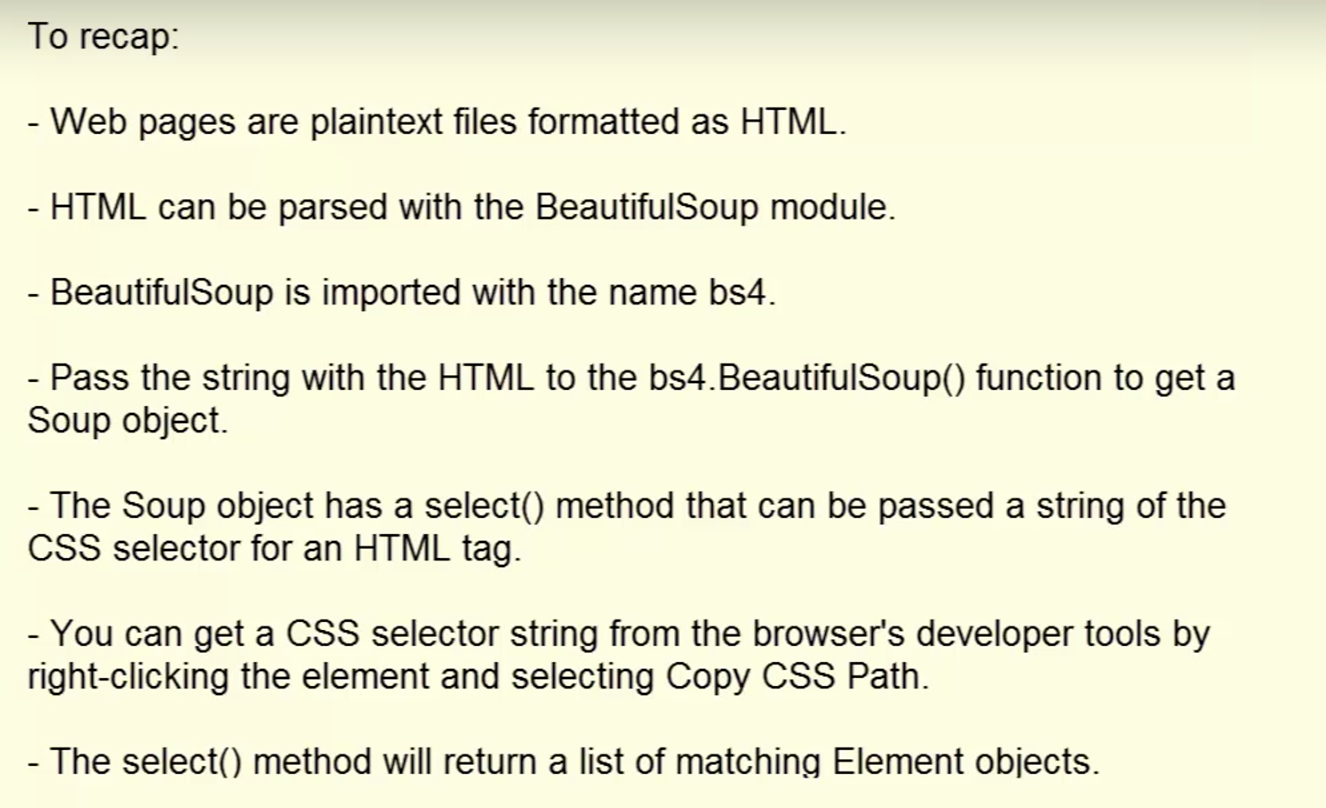

# Lesson 41: Controlling the Browser with the Selenium Module

In [85]:
from selenium import webdriver

In [86]:
import os
os.getcwd()

'/Users/mr_jacklu/Documents/Learning - Data Science/Automate the Boring Stuff with Python Programming'

In [90]:
browser = webdriver.Firefox(executable_path = '/usr/local/bin/geckodriver')

In [91]:
browser.get('https://automatetheboringstuff.com')

In [92]:
elem = browser.find_element_by_css_selector('.main > div:nth-child(1) > ul:nth-child(23) > li:nth-child(1) > a:nth-child(1)')

In [93]:
elem

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="792e7d31-07d4-9b45-900a-0adf0eaa1b3c", element="2a1e9731-65ec-1f41-9de8-a3200b4550f6")>

In [94]:
elem.click()

In [95]:
elems = browser.find_elements_by_css_selector('p')

In [96]:
len(elems)

112

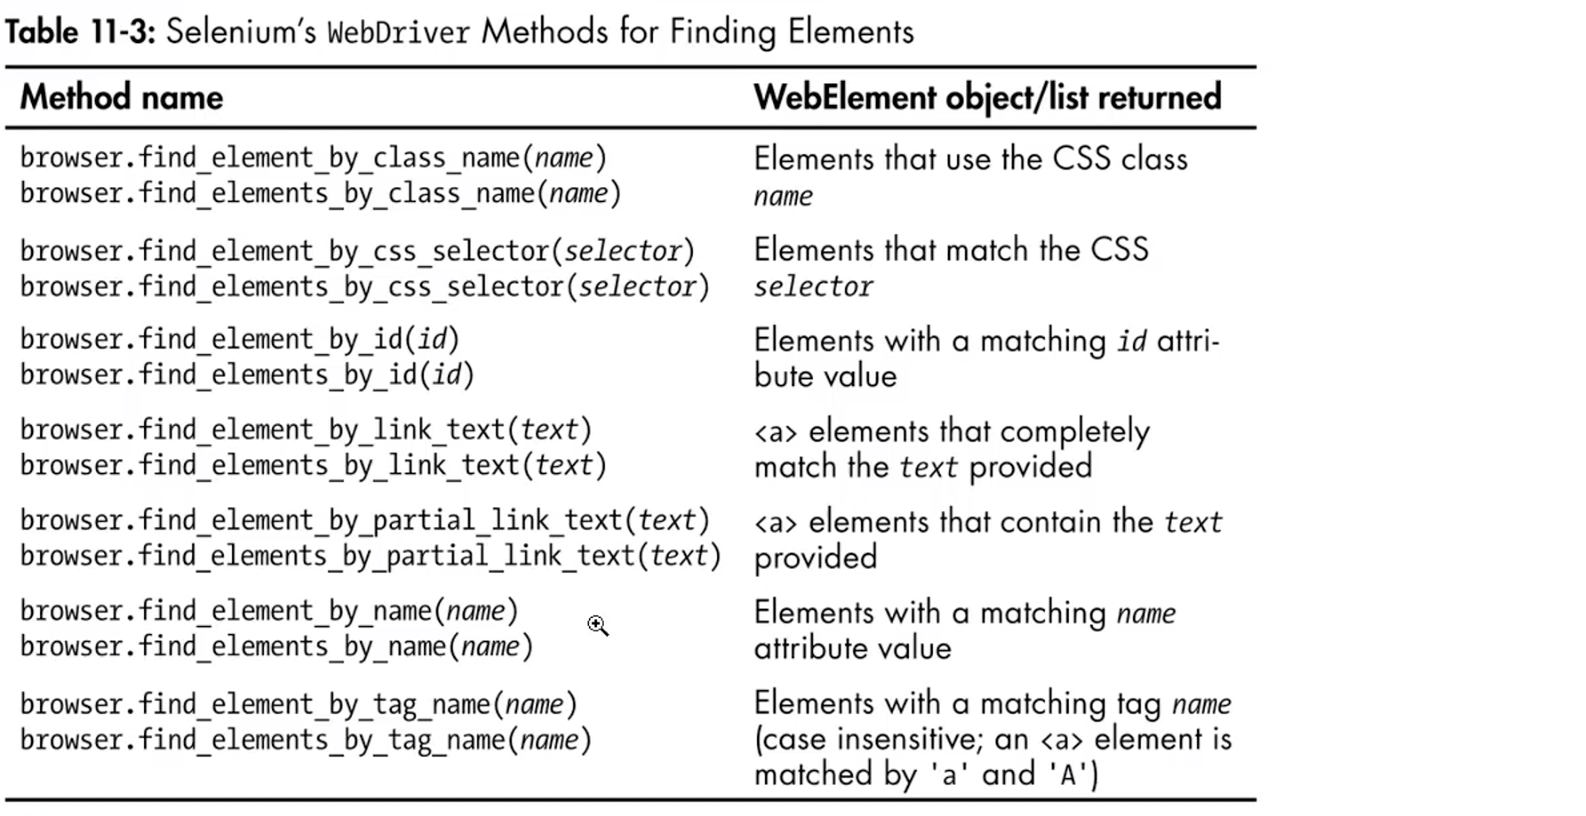

In [98]:
# Search field form. Use google.com.

searchElem = browser.find_element_by_css_selector('.gLFyf')

searchElem.send_keys('zophie')
searchElem.submit()

In [99]:
browser.back()

In [100]:
browser.forward()

In [101]:
browser.refresh()

In [102]:
browser.quit()